![student studying](https://images.unsplash.com/photo-1434030216411-0b793f4b4173?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80)

Photo by [Green Chameleon](https://unsplash.com/@craftedbygc?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText) on [Unsplash](https://unsplash.com/s/photos/study?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText)
# Modélisation des résultats aux examens de 3ème trimestre
---
## Entrainement et évaluation d'un modèle
Maintenant que nous possédons un jeu de données fiable, il ne reste plus qu'à entrainer un modèle mathématique qui va analyser toutes les colonnes du jeu de données et essayer de comprendre quels sont les facteurs qui permettent de prédire le score final d'un étudiant.


## Import du jeu de données

Comme précédemment, nous importons la librairie Pandas et le jeu de données précédent :

```
import pandas as pd

df = pd.read_csv("./student-3-prepared.csv")
df
```

In [1]:
# Insère ton code ci-dessous et exécute la cellule
import pandas as pd

df = pd.read_csv("./student-3-prepared.csv")
df

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,18,1,4,4,2,2,0,1,0,...,4,3,4,1,1,3,6,5,6,6
1,1,17,0,1,1,1,2,0,0,1,...,5,3,3,1,1,3,4,5,5,6
2,1,15,0,1,1,1,2,3,1,0,...,4,3,2,2,3,3,10,7,8,10
3,1,15,0,4,2,1,3,0,0,1,...,3,2,2,1,1,5,2,15,14,15
4,1,16,0,3,3,1,2,0,0,1,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,20,1,2,2,1,2,2,0,1,...,5,5,4,4,5,4,11,9,9,9
391,0,17,0,3,1,2,1,0,0,0,...,2,4,5,3,4,2,3,14,16,16
392,0,21,0,1,1,1,1,3,0,0,...,5,5,3,3,3,3,3,10,8,7
393,0,18,0,3,2,3,1,0,0,0,...,4,4,1,3,4,5,0,11,12,10


## Préparation des jeux de données d'entrainement et de test
En Data Science, la méthodologie consiste à scinder le jeu de données intial en 4 :

* **X_train** = toutes les colonnes à l'exception de "G3" pour 375 étudiants*
* **y_train** = uniquement la colonne "G3" pour les mêmes 375 étudiants*

(* ce nombre correspond à ~95% des étudiants. Ce ratio varie normalement entre 70 et 90% en fonction des projets)


* **X_test** = toutes les colonnes à l'exception de "G3" pour les 20 étudiants restants
* **y_test** = uniquement la colonne "G3" pour les mêmes 20 étudiants

Pour réaliser cette opération, nous allons faire appel à un librairie très populaire : "**SciKit-Learn**", qui a été développée par l'INRIA (un institut de recherche Français) et utilisée par tous les Data Scientists à travers le monde.

Commençons par importer la fonction qui va scinder le jeu de données pour nous de façon aléatoire :

```
from sklearn.model_selection import train_test_split
```

In [2]:
# Insère ton code ci-dessous et exécute la cellule
from sklearn.model_selection import train_test_split

---
L'opération va se dérouler en 2 étapes :

1. Nous allons d'abord séparer le jeu de données "df" en 2 :
* X => toutes les colonnes sauf "G3" (ce sont les paramètres qui vont nous permettre de faire des prédictions)
* y => la colonne "G3" (c'est la cible que nous cherchons à modéliser)

2. Et ensuite nous pourrons en extraire X_train, X_test, y_train et y_test.

---

Commençons par créer X et y:

```
X = df.drop("G3", axis=1)
y = df["G3"]
```

Notes :

* la fonction "drop" indique à Pandas que nous souhaitons créer X en partant de "df" mais en supprimant "G3". L'instruction "axis=1" indique à Pandas que "G3" est une colonne que nous souhaitons supprimer car nous pourrions aussi lui demander de supprimer une ligne en utilisant axis=0.

* y correspond simplement à la colonne "G3" de "df".

In [3]:
# Insère ton code ci-dessous et exécute la cellule
X = df.drop("G3", axis=1)
y = df["G3"]

Nous pouvons vérifier que l'opération s'est bien déroulée en utilisant la commande "shape" qui donne la dimension d'un jeu de données.

```
print(X.shape)
```

In [4]:
# Insère ton code ci-dessous et exécute la cellule
print(X.shape)

(395, 25)


(395, 25) => Nous indique que X a bien 25 colonnes (26 colonnes au départ - la colonne "G3")

---
Maintenant que X et y sont créés, nous pouvons créer les jeux de données finaux :
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)
```
Note : avec "test_size=20", nous indiquons que nous voulons garder 20 étudiants dont les informations ne seront pas utilisées pour l'entrainement et qui serviront à tester la robustesse du modèle sur des données qu'il n'a pas vues pendant l'entrainement.

In [5]:
# Insère ton code ci-dessous et exécute la cellule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)

Utilisons à nouveau ".shape" pour regarder les tailles de X_train et X_test :

In [6]:
# Cellule 1 - Dimensions de X_train
# Insère ton code ci-dessous et exécute la cellule
print(X_train.shape)

(375, 25)


In [7]:
# Cellule 2 - Dimensions de X_test
# Insère ton code ci-dessous et exécute la cellule
print(X_test.shape)

(20, 25)


Si l'opération s'est bien déroulée, les valeurs suivantes se sont affichées :

* X_train => (375, 25)
* X_test => (20, 25)

## Entrainement du modèle
Nous allons utiliser un des algorithmes les plus connus et les plus simples : la régression linéaire.

C'est un algorithme qui va tenter de trouver une équation où la cible "y" correspond à la somme des paramètres connus, multipliés à chaque fois par un coefficient.

Exemple simplifié : \\[ y \approx (parametre_1 * coef_1) + (parametre_2 * coef_2) +  ...  + (parametre_{n-1} * coef_{n-1}) + (parametre_n * coef_n)\\]

Et dans le cas ici présent, l'équation va correspondre à déterminer "G3" en fonction de tous les éléments connus sur l'étudiant :

\\[ G3 \approx (sex * coef_1) + (age * coef_2) + (Pstatus * coef_3) + ... + (G2 * coef_{n-1}) + (G3 * coef_n)\\]

---

Commençons par importer la fonction de Régression Linéaire

```
from sklearn.linear_model import LinearRegression
```

In [8]:
# Insère ton code ci-dessous et exécute la cellule
from sklearn.linear_model import LinearRegression

Nous allons ensuite créer un modèle "reg_lin" et l'entrainer (= fit) sur les données d'entrainement (logique !)

```
reg_lin = LinearRegression(normalize=True)
reg_lin.fit(X_train, y_train)
```

In [9]:
%%time
# Insère ton code ci-dessous et exécute la cellule
reg_lin = LinearRegression(normalize=True)
reg_lin.fit(X_train, y_train)

Wall time: 4.99 ms


LinearRegression(normalize=True)

Comme tu as pu le constater, nous avions ajouté la commande "%%time" au début de la cellule pour calculer le temps d'exécution de la celulle. L'entrainement du modèle n'a pris que quelques millisecondes !

---

## Evaluation du modèle
Maintenant, nous allons évaluer quelle est la performance du modèle sur des données qu'il n'a jamais vues. 

Il existe une fonction toute faite pour calculer ce score (R²) qui varie entre 0 (modèle inutile) et 1 (modèle parfait).

```
reg_lin.score(X_test, y_test)
```

In [10]:
# Insère ton code ci-dessous et exécute la cellule
reg_lin.score(X_test, y_test)

0.793077158003409

En fonction des jeux de données utilisés (qui se construisent au hasard quand nous utilisons la fonction "train_test_split"), tu devrais obtenir un score entre 75 et 95%, ce qui est un très bon score !

Mais, après tout, un score ne veut pas dire grand-chose...

Il serait plus intéressant de faire la comparaison entre les prédictions du modèle et la réalité !

Nous allons donc créer un petit DataFrame avec 2 colonnes : "G3" et "G3_predictions"

```
comparaison = pd.DataFrame(data = y_test)
comparaison["G3_predictions"]=reg_lin.predict(X_test)
comparaison
```

*Note : la 1ère ligne crée un nouveau DataFrame qui s'appelle "comparaison" avec une 1ère colonne qui n'est autre que les valeurs réelles de G3. La seconde ligne ajoute une colonne qui correspond aux prédictions faites par le modèle.*

In [11]:
# Insère ton code ci-dessous et exécute la cellule
comparaison = pd.DataFrame(data = y_test)
comparaison["G3_predictions"]=reg_lin.predict(X_test)
comparaison

,G3,G3_predictions
53,11,9.609239
360,13,13.029671
297,8,7.853567
118,8,7.410154
270,9,7.785895
233,13,12.975145
78,10,6.385597
3,15,13.549176
41,12,13.330256
55,10,8.355084


Nous pouvons constater que les prédictions sont relativement proches **mais aussi que le modèle utilise des décimales** alors qu'il n'y en a pas dans les vraies valeurs.

Nous pourrions donc utiliser une fonction d'arrondi pour simplifier la comparaison :

```
comparaison.round()
```

In [12]:
# Insère ton code ci-dessous et exécute la cellule
comparaison.round()

,G3,G3_predictions
53,11,10.0
360,13,13.0
297,8,8.0
118,8,7.0
270,9,8.0
233,13,13.0
78,10,6.0
3,15,14.0
41,12,13.0
55,10,8.0


La proximité entre les valeurs réelles et prédites est encore plus flagrante !

---

## Affichage des prédictions
Et si nous utilisions une représentation graphique pour visualiser à quel point les prédictions sont proches de la réalité ?
Exécute le code ci-dessous qui fait appel à la librairie "Matlplotlib" que nous avons utilisée au début de notre exploration de données.

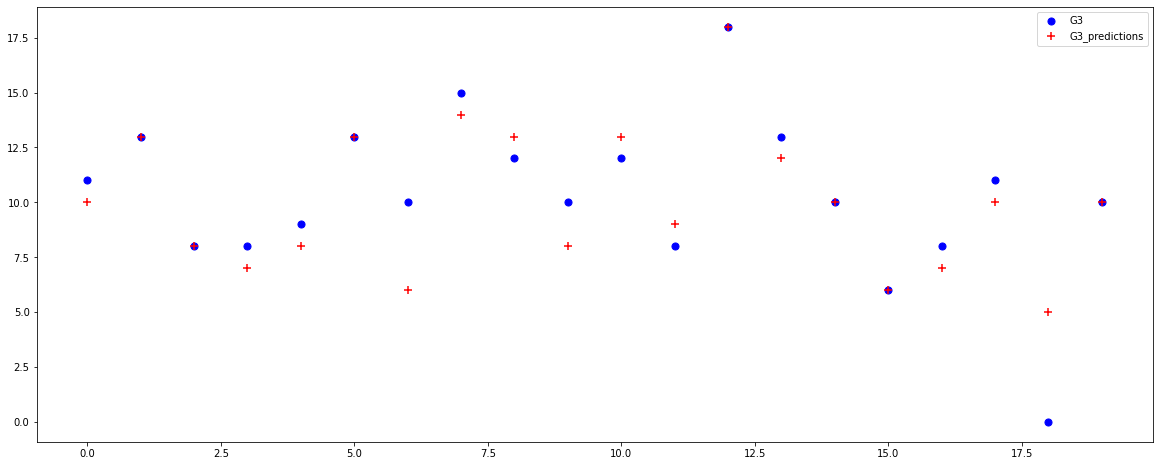

In [13]:
# Cellule à exécuter
import matplotlib.pyplot as plt

comparaison = comparaison.reset_index()

fig = plt.figure()
fig.set_size_inches(20, 8)
ax1 = fig.add_subplot(111)
ax1.scatter(comparaison.index, comparaison["G3"], c='b', s=50, marker="o", label="G3")
ax1.scatter(comparaison.index, comparaison["G3_predictions"].round(), c='r', s=80, marker="+", label="G3_predictions")
ax1.legend()
plt.show()

Normalement, tu dois parfois voir des points (croix et ronds) parfaitement alignés (prédiction parfaite !) et parfois des points plus éloignés (erreur de prédiction...).

---

## Paramètres influents
Il est intéressant de voir sur quels paramètres se base l'algorithme pour faire une si bonne prédiction. Exécute la cellule ci-dessous qui va créer un tableau avec les paramètres les plus importants... que nous identifions car ils ont les coefficients les plus élevés.

In [14]:
# Cellule à exécuter
coef_importance = pd.DataFrame(data=reg_lin.coef_, columns=["coef"], index=X_train.columns)
coef_importance["importance"] = abs(coef_importance["coef"])
coef_importance.sort_values(by="importance", ascending=False)

,coef,importance
G2,0.960607,0.960607
higher,0.430414,0.430414
activities,-0.409874,0.409874
nursery,-0.355094,0.355094
famrel,0.353156,0.353156
schoolsup,0.349532,0.349532
internet,-0.248779,0.248779
romantic,-0.195606,0.195606
age,-0.184743,0.184743
G1,0.183171,0.183171


L'interprétation des coefficients n'est pas aisée ! N'hésite pas à regarder ces résultats avec ton référent !

- la colonne "importance" montre à quel point le paramètre joue un rôle dans la prédiction
- la colonne "coef" indique si c'est un effet positif ou négatif

Quelques exemples :

* "**G2**" a le coefficient le plus fort et il est positif => c'est logique car avoir de bons résultats au second trimestre donne confiance pour les résultats du 3ème trimestre ; le modèle en tient beaucoup compte !

* "**activities**" a un coefficient élevé mais il est négatif => pour le modèle, avoir des activités extra-scolaires a un impact négatif sur la note du 3ème trimestre.

* "**failures**" a un coefficient modéré et il est négatif => d'après le modèle, avoir redoublé lors des classes précédentes peut indiquer que l'on a des difficultés dans sa scolarité et il considère que cela diminue les chances d'avoir un bon score au 3ème trimestre.

* "**sex**" est en bas du classement => cela veut donc dire que, pour le modèle, être une fille ou un garçon n'est pas un critère qui l'aide à évaluer la note du 3ème trimestre !

Si tu es arrivé(e) jusqu'ici, mille félicitations car tu as bouclé ton étude de Data Scientist ! 🙌

Petit rappel de tout ce que tu as entrepris :

Tu as appris à :

- maitriser beaucoup de commandes en Python
- importer, explorer, analyser, corriger et transformer un jeu de données
- entrainer un modèle pour qu'il puisse établir des prédictions
- tester ces prédictions sur des valeurs inconnues et évaluer la performance de l'algorithme !

---

Et si tu as envie d'aller encore un tout petit plus loin dans ton analyse => [c'est par ici](./student-notebook-5-aller_plus_loin.ipynb) !